<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [18]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [19]:
df = df0.copy()

In [20]:
df.head()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58


In [21]:
df.groupby("status", dropna = False).mean(numeric_only=True)

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 748.0+ bytes


In [7]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [8]:
df.var1[3]

'nan'

In [9]:
type(df.var1[3])

str

In [10]:
type(df.status[10])

float

In [11]:
df.status.value_counts(dropna = False)

status
FT     4
PT     4
-      2
NaN    1
Name: count, dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [12]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [13]:
type(df.status[10])

float

In [14]:
type(df.salary[6])

NoneType

In [15]:
type(np.nan)

float

In [16]:
type(np.NaN)

float

In [17]:
display(np.isnan(np.nan), np.isnan(np.NaN))

True

True

In [18]:
type(None)

NoneType

In [19]:
print(0 * np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)


nan
nan
nan
nan
nan


In [20]:
print(np.nan == np.nan)


False


In [21]:
print(10 > np.nan)


False


In [22]:
print(10 < np.nan)

False


In [23]:
print(np.inf > np.nan)


False


In [24]:
print(np.nan is np.nan)

True


In [25]:
id(np.nan)

2006027525072

In [26]:
id(np.nan)

2006027525072

In [27]:
print(0.3 == 3 * 0.1)

False


In [28]:
df.salary

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [29]:
type(df.salary[0])

float

In [30]:
type(df.salary[6])

NoneType

In [31]:
type(df.salary[1])

int

In [32]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [33]:
type(df.status[2])

str

In [34]:
type(df.status[10])

float

In [35]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [36]:
type(df.var1[3])

str

In [37]:
type(df.var1[0])

str

In [38]:
type(df.var1[10])
#type(df.var1.iloc[-1])

str

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [39]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [40]:
df.isnull()

# df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [41]:
df.notnull()

#df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [42]:
pd.isnull == pd.isna

True

In [43]:
id(pd.isnull)

2006040520128

In [44]:
id(pd.isna)

2006040520128

In [45]:
# columns/variables containing any missing values

df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [46]:
# rows containing any missing values

df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [47]:
#number of missing values in the columns

df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [48]:
True + True

2

In [49]:
sum([True, True, True, False, False ])

3

In [50]:
#number of missing values in the all DataFrame

df.isnull().sum().sum()

9

In [51]:
df.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [52]:
df.salary.isnull().any()

True

In [53]:
df.salary.isnull().sum()

3

In [54]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [55]:
# percentage of null values by columns

df.isnull().sum()/len(df)*100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [56]:
df.isnull().sum()/df.shape[0] * 100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [57]:
df.isnull().mean(numeric_only=True)* 100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [58]:
df["salary"].isnull().mean(numeric_only=True)* 100

27.27272727272727

In [59]:
# to examine rows having missing value

df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [60]:
# rows containing full of notnull values using "~"

df[~df.isnull().any(axis = 1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [61]:
#df[df.isnull().all(axis=1)]
df.loc[df.isnull().all(axis=1)]

,id,gender,status,dept,var1,var2,salary


In [62]:
df.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [63]:
# to examine rows having missing value for specific column

#df[df.salary.isnull()]
df.loc[df.salary.isnull()]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [64]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [65]:
df.dept == "FS"

0     False
1      True
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
Name: dept, dtype: bool

In [66]:
df.loc[df.dept == "FS"]

,id,gender,status,dept,var1,var2,salary
1,P002,F,PT,FS,3,NaN,54
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136


In [67]:
df.dept.isnull()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10    False
Name: dept, dtype: bool

In [68]:
df.loc[df.dept.isnull()]

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [69]:
df.loc[df.dept.isnull(), ["salary", "dept"]]

,salary,dept
5,75,None
8,60,NaN


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [70]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [71]:
df["var1"].map({"-": np.nan})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [72]:
text = "cl-rusw-y"

In [73]:
text.replace("-", "a")

'clarusway'

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [74]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [75]:
df["var1"].replace(to_replace="-", value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [76]:
type(df["var1"][6])

str

In [77]:
df["var1"].replace("-", np.nan).astype("float")
#df["var1"].replace(["-", "nan"], np.nan)

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [78]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [79]:
df["var1"].replace(["-", "nan"], np.nan)


0       2
1       3
2       5
3     NaN
4       7
5       1
6     NaN
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [80]:
df["var1"] = df["var1"].replace("-", np.nan).astype("float")

In [81]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [82]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [83]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [84]:
df["gender"].map({"M" : 1, "F" : 0})
#df["gender"].replace({"M" : 1, "F" : 0})
#df["gender"].replace(["M", "F"], [1, 0])

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [85]:
df.gender

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

In [86]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [87]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [88]:
# it removes the rows which contains any (at least one missing value) missing value

df.dropna(axis=0, how="any", inplace=False)

#how : {'any','all'}, default 'any', Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
#inplace : bool, default False, If True, do operation inplace and return None.
#thresh : Require that many non-NA values.

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [89]:
# it removes the columns which contains any (at least one missing value) missing value

df.dropna(axis=1, how="any", inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [90]:
df.dropna(axis=1, how="all", inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [91]:
# let's create a column containing full of missing value

df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [92]:
# now let's drop the comlumn containing full of missing value

df.dropna(axis = 1, how = "all", inplace = True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [93]:
# Keep only the columns with at least 9 non-NA values.

df.dropna(axis=1, thresh=9, inplace=False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [94]:
df.drop([1, 3, 5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [95]:
# df.drop(["var1", "var2"]) # gives an error

df.drop(["var1", "var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [96]:
df.drop(columns=["var1", "var2"])

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [97]:
df.drop(index=[1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [98]:
df.drop(columns=["id", "var1"])

,gender,status,dept,var2,salary
0,M,FT,DS,8.0,NaN
1,F,PT,FS,NaN,54
2,M,NaN,AWS,5.0,59
3,F,FT,AWS,8.0,120
4,M,PT,DS,11.0,58
5,F,PT,None,NaN,75
6,M,FT,FS,NaN,None
7,F,NaN,FS,2.0,136
8,M,PT,NaN,3.0,60
9,F,FT,DS,7.0,125


 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()

In [99]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


 ### a.Filling with a specific value

In [100]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [101]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [102]:
df["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 ### b.Filling with any Proper Value

In [103]:
df["var1"].mean()

6.0

In [104]:
df["var1"].fillna(df["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [105]:
df["var1"].median()

5.5

In [106]:
df["var1"].fillna(df["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [107]:
df.mean(numeric_only=True)

var1    6.000
var2    6.625
dtype: float64

In [108]:
df.fillna(df.mean(numeric_only=True))

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [109]:
df.fillna({"dept": "other", "var1": df.var1.mean(), "var2": df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


In [110]:
df.mean(numeric_only=True)[["var1", "var2"]]

var1    6.000
var2    6.625
dtype: float64

In [111]:
df.fillna(df.mean(numeric_only=True)[["var1", "var2"]])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


**where() Replace values where the condition is False.**

In [112]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [113]:
# df.where(pd.notna(df), df.mean(), axis = "columns")

df.where(cond=df.notna(), other=df.mean(numeric_only=True), axis = 1)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,NaN
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [114]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Fill NaN values using an interpolation method.**

In [115]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


**The interpolate() method did not affect the `salary` column"!!**

**This is because the dtype of the column is `object`**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  8 non-null      object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 748.0+ bytes


In [117]:
df.salary = df.salary.astype("float")
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [118]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,8.0,75.0
6,P007,M,FT,FS,5.5,5.0,105.5
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


**Let's see the effect of parameters on a simple series:**

In [119]:
s = pd.Series([None, 54.0, 59.0, 120.0, 58.0, 75.0, None, 136.0, 60.0, 125.0, None])
s

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
dtype: float64

In [120]:
s.interpolate(limit_area="inside")

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6     105.5
7     136.0
8      60.0
9     125.0
10      NaN
dtype: float64

In [121]:
s.interpolate(limit_area="outside")

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10    125.0
dtype: float64

In [122]:
s.interpolate(limit_direction="backward", limit_area="outside")

0      54.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
dtype: float64

In [123]:
s.interpolate(limit_area="inside").interpolate(limit_area="outside").interpolate(limit_direction="backward", limit_area="outside")

0      54.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6     105.5
7     136.0
8      60.0
9     125.0
10    125.0
dtype: float64

In [124]:
# or:
s.interpolate(limit_direction='both')

0      54.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6     105.5
7     136.0
8      60.0
9     125.0
10    125.0
dtype: float64

For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 ### c.Filling the Missing Values of Categorical Variables

In [125]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [126]:
df["dept"].mode()

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [127]:
df["dept"].mode()[0]

'AWS'

In [128]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [129]:
df["dept"]

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [130]:
df["dept"].fillna(method = "bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [131]:
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [132]:
df["status"].fillna(method = "ffill")

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

 ### d.Filling by condition & by Group of the Categorical Variables 

In [133]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [152]:
df["dept"].fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [134]:
df_grp = df.copy()

In [136]:
df.loc[df["salary"]>=100, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [137]:
df.loc[df["salary"]<100, "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [138]:
# inplace=True didn't work

df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [139]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [140]:
df_grp

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [141]:
df_grp.groupby("status").salary.agg(["mean", min, max])

,mean,min,max
status,,,
FT,122.50,120.0,125.0
PT,61.75,54.0,75.0


In [142]:
df_grp.groupby("status", dropna=False).salary.agg(["mean", min, max])

,mean,min,max
status,,,
FT,122.50,120.0,125.0
PT,61.75,54.0,75.0
NaN,97.50,59.0,136.0


In [143]:
df_grp.groupby("status", dropna=False).salary.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
FT,2.0,122.50,3.535534,120.0,121.25,122.5,123.75,125.0
PT,4.0,61.75,9.178780,54.0,57.00,59.0,63.75,75.0
NaN,2.0,97.50,54.447222,59.0,78.25,97.5,116.75,136.0


In [144]:
df_grp[df_grp["status"].isnull()][["status"]]

,status
2,NaN
7,NaN
10,NaN


In [145]:
df_grp[df_grp["status"].isnull()]

,id,gender,status,dept,var1,var2,salary
2,P003,M,NaN,AWS,5.0,5.0,59.0
7,P008,F,NaN,FS,10.0,2.0,136.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [146]:
df_grp.loc[2, "status"] = "PT"  # df.status.loc[2] = "PT"

df_grp.loc[7, "status"] = "FT"  # df.status.loc[7] = "FT"

In [147]:
df_grp

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [148]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [153]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [151]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [154]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [155]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,FT
5,P006,F,PT,DS,1.0,NaN,75.0,FT
6,P007,M,FT,FS,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,FT
8,P009,M,PT,FS,14.0,3.0,60.0,FT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [156]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]), inplace=True)
#df["status"].fillna(df["trans_status"], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,FT
5,P006,F,PT,DS,1.0,NaN,75.0,FT
6,P007,M,FT,FS,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,FT
8,P009,M,PT,FS,14.0,3.0,60.0,FT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [157]:
# regarding to avg of "salary" in terms of "department"

df.groupby("dept")["salary"].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [158]:
#regarding to avg of "salary" in terms of "status and department"

df.groupby(["status", "dept"])["salary"].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [159]:
df.groupby(["status", "dept"])["salary"].transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [160]:
df["trans_salary"] = df.groupby(["status","dept"])["salary"].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


In [161]:
df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)
#df["salary"].fillna(df["trans_salary"], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [162]:
df.groupby(["gender", "status"])["var1"].mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [163]:
df.groupby(["gender","status"])["var1"].transform("mean")

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [164]:
trans_var1 = df.groupby(["gender", "status"])["var1"].transform("mean")

In [166]:
df["var1"].fillna(trans_var1, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [167]:
df["var2"]

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [168]:
df.groupby(["status"])["var2"].mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [169]:
trans_var2 = df.groupby(["status"])["var2"].transform("mean")
trans_var2

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [170]:
df["var2"].fillna(trans_var2, inplace = True)

In [171]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0


### e.Filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [2]:
import matplotlib.pyplot as plt

In [3]:
flights = sns.load_dataset("flights")

In [4]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [5]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [6]:
ser = pd.Series(np.random.rand(10))
ser

0    0.247560
1    0.552867
2    0.461129
3    0.181884
4    0.681431
5    0.787250
6    0.370727
7    0.177320
8    0.945090
9    0.640154
dtype: float64

<Axes: >

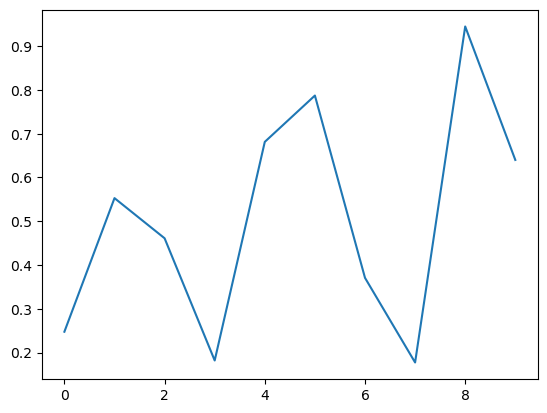

In [7]:
ser.plot()

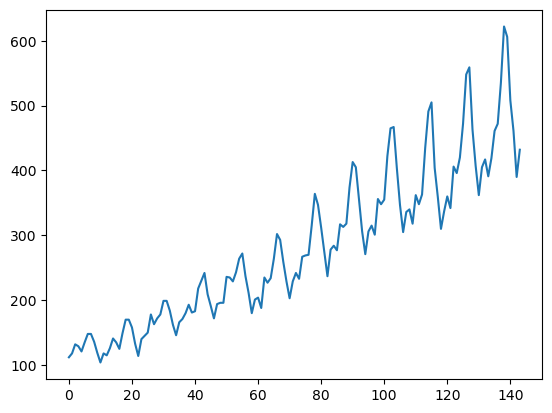

In [8]:
# you don't need to know how this plotting happens.
# just focus on the time-series line

flights.passengers.plot();

In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [10]:
flights_copy = flights.copy()

In [11]:
flights_copy.loc[np.random.randint(1, 144, 20),"passengers"] = None

In [12]:
flights_copy

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,121.0
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,461.0
142,1960,Nov,390.0


In [13]:
flights_copy.isnull().sum()

year           0
month          0
passengers    18
dtype: int64

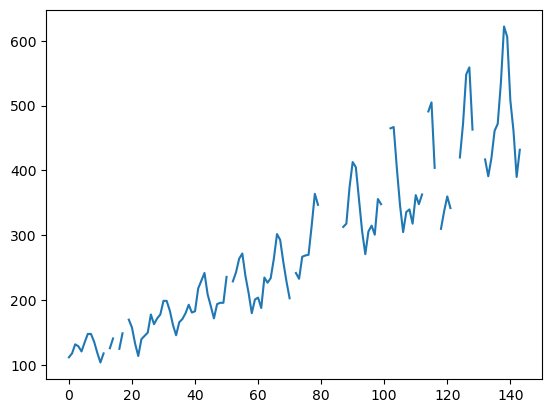

In [14]:
flights_copy.passengers.plot();

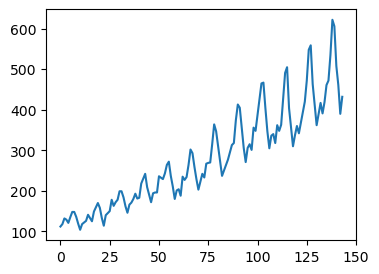

In [15]:
plt.figure(figsize = (4, 3))

flights_copy["passengers"].interpolate().plot(kind="line");

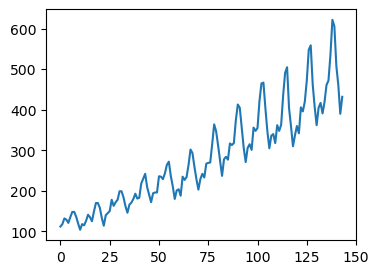

In [16]:
plt.figure(figsize = (4, 3))

flights.passengers.plot();

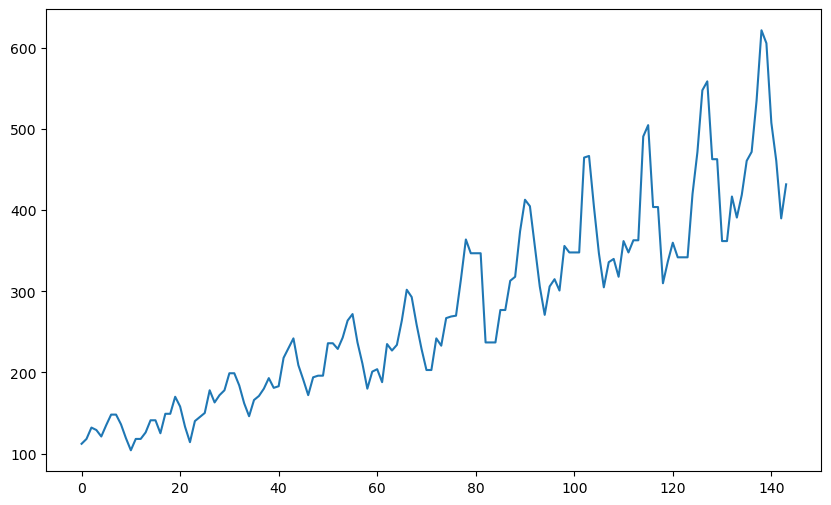

In [17]:
plt.figure(figsize = (10, 6))

flights_copy["passengers"].fillna(method = "ffill").plot(kind="line");

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>